In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats

In [25]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [26]:
boston_df.CHAS = boston_df.CHAS.astype(int)
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


[Text(0, 0.5, 'In $1000s'),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

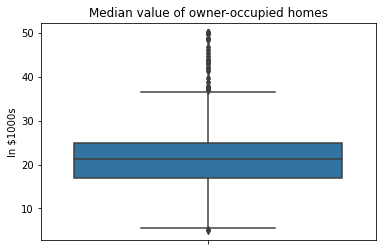

In [27]:
# Boxplot of MEDV
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel = 'In $1000s', title= 'Median value of owner-occupied homes')

Text(0.5, 0, '1 denotes tract bounds river')

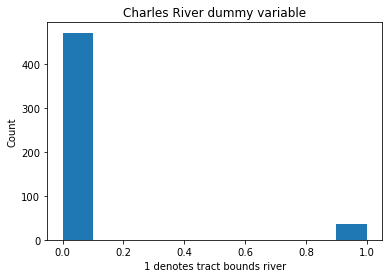

In [44]:
#Histogram of the Charles river dummy variable
pyplot.hist(boston_df['CHAS'], bins = None, align= 'mid', rwidth = 1)
pyplot.title('Charles River dummy variable')
pyplot.ylabel('Count')
pyplot.xlabel('1 denotes tract bounds river')



[Text(0, 0.5, 'MEDV'),
 Text(0.5, 0, ' '),
 Text(0.5, 1.0, 'Median value of owner-occupied homes by home age')]

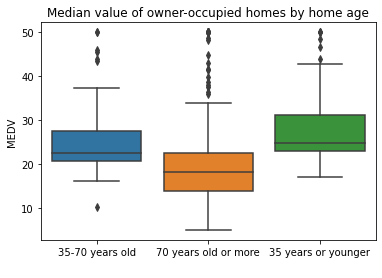

In [29]:
# Boxplot of MEDV vs AGE, discretize age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years or younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = '35-70 years old'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years old or more'

ax = sns.boxplot(y = 'MEDV', x ='age_group', data = boston_df)
ax.set(ylabel = 'MEDV', xlabel = ' ', title = 'Median value of owner-occupied homes by home age')

I would say as the proportion of non-retail buisness acres goes up so does nitric oxide concentrations


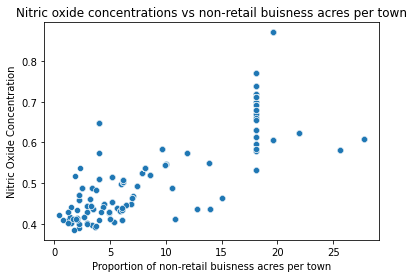

In [30]:
# Scatter plot of Nitric Oxide Conc vs non-retail buisness acres per town
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ax.set(ylabel = 'Nitric Oxide Concentration', xlabel = 'Proportion of non-retail buisness acres per town', title = 'Nitric oxide concentrations vs non-retail buisness acres per town')
comment = 'I would say as the proportion of non-retail buisness acres goes up so does nitric oxide concentrations'
print(comment)

Text(0.5, 0, 'Number of pupils per Teacher')

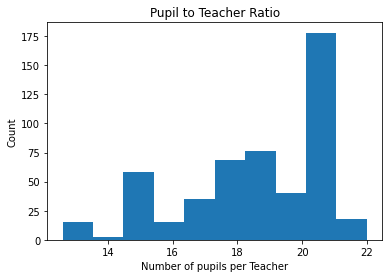

In [31]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil to Teacher Ratio')
pyplot.ylabel('Count')
pyplot.xlabel('Number of pupils per Teacher')

In [32]:
# Is there a signinificant difference in the median value of houses bound by Charles river?
#H_0 There is no difference in the Median Value of homes bound by the Charles river
#H_A The sample means are not equal and there is a difference in median value of homes bound by the Charles river
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

#Our P-Value is much less than 0.05 therefore we can say there is a statistical difference,
# in median values of Homes bound by the Charles river

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [33]:
# ANOVA of MEDV and AGE
# H_0 There is no difference in the median Value of homes across age groups
#H_A There is a difference in atleast one of the means between age groups
new = boston_df[boston_df['age_group'] == '35 years or younger']['MEDV']
mid = boston_df[boston_df['age_group'] == '35-70 years old']['MEDV']
old = boston_df[boston_df['age_group'] == '70 years old or more']['MEDV']
scipy.stats.f_oneway(new, mid, old)

# P value is much less than 0.05, we can conclude that there is a significant differnece
# in MEDV depending on the AGE of the home


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [34]:
#Pearson corelation between nitric oxide (NOX) and non-retail buisness acres per town (INDUS)
# H_0 There is no relationship between NOX and INDUS
#H_A There is some correlation between nitric oxide concentration and non-retail buisness
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#The P-Value is less than 0.05, we can conclude that there is a relationship
# Between NOX and INDUS

(0.7636514469209151, 7.913361061238693e-98)

In [35]:
#regression, what is the impact of an additional weighted distance (DIS) to the five Boston employment centers on the median value of occupied homes (MEDV)
# H_0 Distance to employment centers have no impact on median home value
#H_A Distance from employment centers have an impact on median home value
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# P is less than 0.05, we have sufficient evidence to say that DIS has an impact on median home value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        01:54:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""